Dataset utilizado: Boston Housing

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline

In [3]:
# importanto dataset do módulo scikit-learn.
from sklearn.datasets import load_boston
boston = load_boston()

In [4]:
# descrição do dataset
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
df = pd.DataFrame(boston.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
# mudando os nomes das colunas
df.columns = boston.feature_names
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
# adicionando coluna de preço ao dataframe 
df['PRICE'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [9]:
# importando modelo de regressão linear
from sklearn.linear_model import LinearRegression

In [10]:
# removendo coluna preço
x = df.drop('PRICE', axis = 1)

In [11]:
# definindo y
y = df.PRICE

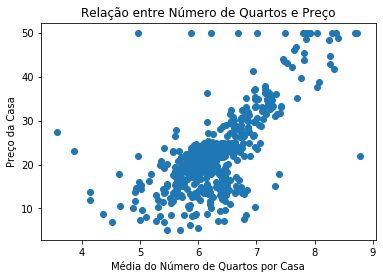

In [12]:
plt.scatter(df.RM, y)
plt.xlabel("Média do Número de Quartos por Casa")
plt.ylabel("Preço da Casa")
plt.title("Relação entre Número de Quartos e Preço")
plt.show()

In [17]:
# importanto modulo de separação de treino e teste
from sklearn.model_selection import train_test_split


In [18]:
# separando variáveis de treino e teste
X_treino, X_teste, Y_treino, Y_teste = train_test_split(x, df.PRICE, test_size = 0.30, random_state = 5)

In [19]:
reg = LinearRegression()

In [21]:
reg.fit(X_treino, Y_treino)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
treino_pred = reg.predict(X_treino)
teste_pred = reg.predict(X_teste)

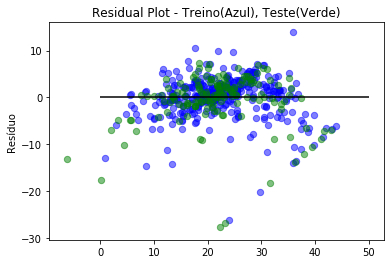

In [25]:
# comparação dos preços originais com os preditos.
plt.scatter(reg.predict(X_treino), reg.predict(X_treino) - Y_treino, c = 'b', s = 40, alpha = 0.5)
plt.scatter(reg.predict(X_teste), reg.predict(X_teste) - Y_teste, c = 'g', s = 40, alpha = 0.5)
plt.hlines(y = 0, xmin = 0, xmax = 50)
plt.ylabel("Resíduo")
plt.title("Residual Plot - Treino(Azul), Teste(Verde)")
plt.show()